In [8]:
import spotipy

# Import API key
# from api_keys import client_id
# if client_id == "YOUR KEY HERE!":
#     import sys
#     sys.path.append(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/APIs/config_keys/")
#     from api_keys_v2 import client_id
# from api_keys import client_secret
# if client_id == "YOUR KEY HERE!":
#     import sys
#     sys.path.append(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/APIs/config_keys/")
#     from api_keys_v2 import client_secret

client_id = 'b03657ef2fd545e29e7fe1d40fd9ab3f'
client_secret = 'secret'

from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="b03657ef2fd545e29e7fe1d40fd9ab3f",
#                                                            client_secret="d631ddde6bc54ca198b780254b42a99e"))


In [9]:
import json
import pandas as pd
import time

#open csv file and read with pandas JIC
csv_path = 'may_combined_df_viral50.csv'
may_viral_df = pd.read_csv(csv_path)
may_viral_df.head()

# Make blank column for storing the artist ID
may_viral_df['Artist ID'] = ""
may_viral_df['Genre 1'] = ""
may_viral_df['Genre 2'] = ""
may_viral_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in may_viral_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    may_viral_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in may_viral_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        may_viral_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        may_viral_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        may_viral_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(1.1)



Index 0 genre not found... skipped
Index 1 genre not found... skipped
Index 3 genre not found... skipped
Index 4 genre not found... skipped
Index 5 genre not found... skipped
Index 9 genre not found... skipped
Index 11 genre not found... skipped
Index 13 genre not found... skipped
Index 14 genre not found... skipped
Index 15 genre not found... skipped
Index 16 genre not found... skipped
Index 19 genre not found... skipped
Index 21 genre not found... skipped
Index 22 genre not found... skipped
Index 23 genre not found... skipped
Index 27 genre not found... skipped
Index 30 genre not found... skipped
Index 32 genre not found... skipped
Index 35 genre not found... skipped
Index 36 genre not found... skipped
Index 37 genre not found... skipped
Index 39 genre not found... skipped
Index 42 genre not found... skipped
Index 43 genre not found... skipped
Index 44 genre not found... skipped
Index 46 genre not found... skipped
Index 47 genre not found... skipped
Index 49 genre not found... skippe

In [10]:
may_viral_df.value_counts('Genre 1')

Genre 1
                           24
alt z                      16
contemporary country       14
viral rap                  10
dance pop                   7
pop r&b                     7
alternative r&b             7
melodic rap                 7
afroswing                   5
country pop                 5
rap                         4
art pop                     4
bedroom soul                4
brooklyn drill              4
emo rap                     4
canadian hip hop            4
ccm                         4
indie pop                   4
corridos tumbados           4
future funk                 4
tropical house              4
escape room                 4
belarusian indie            3
corrido                     3
social media pop            3
edm                         3
north carolina hip hop      3
florida rap                 2
adult standards             2
alternative hip hop         2
nz pop                      2
bedroom pop                 2
neo-psychedelic             2
mo

In [11]:
new_may_viral_df=may_viral_df.copy()
for index, row in new_may_viral_df.iterrows():
    if row['Genre 1'] == "" :
        new_may_viral_df.loc[index, 'Genre 1'] = "unspecified"

new_may_viral_df.value_counts('Genre 1')

Genre 1
unspecified                24
alt z                      16
contemporary country       14
viral rap                  10
pop r&b                     7
melodic rap                 7
dance pop                   7
alternative r&b             7
country pop                 5
afroswing                   5
rap                         4
ccm                         4
tropical house              4
emo rap                     4
escape room                 4
corridos tumbados           4
future funk                 4
art pop                     4
indie pop                   4
canadian hip hop            4
brooklyn drill              4
bedroom soul                4
corrido                     3
social media pop            3
north carolina hip hop      3
edm                         3
belarusian indie            3
alternative hip hop         2
bedroom pop                 2
adult standards             2
dark trap                   2
florida rap                 2
nz pop                      2
ne

In [12]:
may_viral_df.head(10)

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,50//50,Vantage,https://open.spotify.com/track/36lNDeaRf8F8aYa...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6owH8F2INpb18PhnISiVh2,future funk,,
1,1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,1lmU3giNF3CSbkVSQmLpHQ,tropical house,,
2,2,3,Con Tus Besos,Eslabon Armado,https://open.spotify.com/track/6WYB1odDfMPVMyp...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,0XeEobZplHxzM9QzFQWLiR,corridos tumbados,nuevo regional mexicano,sierreno
3,3,4,LMK,Lil Xxel,https://open.spotify.com/track/0efL46uAuNEfukX...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,7iDeMFJKjI1ak40N3hoYOZ,pop r&b,,
4,4,5,Yoga,645AR,https://open.spotify.com/track/2DiybJZJGXyV1UY...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,3Iv3mOsjFV8vZkXphpQ8hz,,,
5,5,6,Rockstar Shit,BLIND.SEE,https://open.spotify.com/track/2MvxhedNhxhj32e...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6SSQog9cu2XcgHTRHPmECq,viral rap,,
6,6,7,Desires (with Future),Drake,https://open.spotify.com/track/7eYAHC0RbBF9eaq...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
7,7,8,Play Date,Melanie Martinez,https://open.spotify.com/track/4DpNNXFMMxQEKl7...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,63yrD80RY3RNEM2YDpUpO8,alt z,dance pop,electropop
8,8,9,IDK You Yet,Alexander 23,https://open.spotify.com/track/47EWMOElkkbMp5m...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6sFHvCyqklnJpXC9Nh1aag,alt z,electropop,indie cafe pop
9,9,10,Don't Rush (feat. Headie One),Young T & Bugsey,https://open.spotify.com/track/7LRmDx4pMTQuOBB...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6M6XXCcO5gI68XpIlrUL3Z,afroswing,uk hip hop,


In [13]:
import json
import pandas as pd
import time

#open csv file and read with pandas JIC
csv_path = 'july_combined_df_viral50.csv'
july_viral_df = pd.read_csv(csv_path)
july_viral_df.head()

# Make blank column for storing the artist ID
july_viral_df['Artist ID'] = ""
july_viral_df['Genre 1'] = ""
july_viral_df['Genre 2'] = ""
july_viral_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in july_viral_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    july_viral_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']


for index, row in july_viral_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        july_viral_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        july_viral_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        july_viral_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.2)

july_viral_df.head()

Index 0 genre not found... skipped
Index 1 genre not found... skipped
Index 2 genre not found... skipped
Index 3 genre not found... skipped
Index 4 genre not found... skipped
Index 5 genre not found... skipped
Index 6 genre not found... skipped
Index 9 genre not found... skipped
Index 10 genre not found... skipped
Index 11 genre not found... skipped
Index 12 genre not found... skipped
Index 13 genre not found... skipped
Index 14 genre not found... skipped
Index 15 genre not found... skipped
Index 16 genre not found... skipped
Index 17 genre not found... skipped
Index 18 genre not found... skipped
Index 20 genre not found... skipped
Index 22 genre not found... skipped
Index 23 genre not found... skipped
Index 24 genre not found... skipped
Index 26 genre not found... skipped
Index 27 genre not found... skipped
Index 28 genre not found... skipped
Index 29 genre not found... skipped
Index 33 genre not found... skipped
Index 37 genre not found... skipped
Index 38 genre not found... skipped


,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,I See Red,Everybody Loves an Outlaw,https://open.spotify.com/track/2Xau3uNsnIb9Fwz...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5RCWMaArEntbkeWYVxCiFW,modern blues rock,,
1,1,2,Then Leave (feat. Queendom Come),BeatKing,https://open.spotify.com/track/2Xoc4gqPbBa3QHK...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5L8p9kDnX2cgoI8VLUL2p4,houston rap,,
2,2,3,Stunnin' (feat. Harm Franklin),Curtis Waters,https://open.spotify.com/track/2D0dj3hVkRQJCp6...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,2JbE7jUIGtpXSzytnyMg6U,,,
3,3,4,Hood Baby,KBFR,https://open.spotify.com/track/5au5NgWCdev4WeL...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,0JFjWic1b9Mvv7WcNYhDvZ,viral rap,,
4,4,5,Hard For Me,Michele Morrone,https://open.spotify.com/track/00PesUdTmC3Y5xt...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,03fLoIOO015incUitpfkad,,,


In [14]:
import json
import pandas as pd
import time

#open csv file and read with pandas JIC
csv_path = 'july_combined_df_top200.csv'
july_top200_df = pd.read_csv(csv_path)
july_top200_df.head()

# Make blank column for storing the artist ID
july_top200_df['Artist ID'] = ""
july_top200_df['Genre 1'] = ""
july_top200_df['Genre 2'] = ""
july_top200_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in july_top200_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    july_top200_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in july_top200_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        july_top200_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        july_top200_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        july_top200_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.2)
july_top200_df.head()

Index 0 genre not found... skipped
Index 1 genre not found... skipped
Index 3 genre not found... skipped
Index 5 genre not found... skipped
Index 7 genre not found... skipped
Index 8 genre not found... skipped
Index 10 genre not found... skipped
Index 14 genre not found... skipped
Index 17 genre not found... skipped
Index 18 genre not found... skipped
Index 20 genre not found... skipped
Index 22 genre not found... skipped
Index 23 genre not found... skipped
Index 24 genre not found... skipped
Index 25 genre not found... skipped
Index 26 genre not found... skipped
Index 30 genre not found... skipped
Index 32 genre not found... skipped
Index 33 genre not found... skipped
Index 34 genre not found... skipped
Index 35 genre not found... skipped
Index 36 genre not found... skipped
Index 38 genre not found... skipped
Index 40 genre not found... skipped
Index 41 genre not found... skipped
Index 43 genre not found... skipped
Index 45 genre not found... skipped
Index 47 genre not found... skippe

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,ROCKSTAR (feat. Roddy Ricch),DaBaby,10375792,https://open.spotify.com/track/7ytR5pFWmSjzHJI...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,4r63FhuTkUYltbVAg5TQnk,north carolina hip hop,rap,
1,1,2,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,7298716,https://open.spotify.com/track/0PvFJmanyNQMseI...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,0eDvMgVFoNV3TpwtrVCoTj,brooklyn drill,,
2,2,3,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",Jack Harlow,7189682,https://open.spotify.com/track/2MbdDtCv5LUVjYy...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,2LIk90788K0zvyj2JJVwkJ,deep underground hip hop,kentucky hip hop,pop rap
3,3,4,Watermelon Sugar,Harry Styles,6689854,https://open.spotify.com/track/6UelLqGlWMcVH1E...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,6KImCVD70vtIoJWnq6nGn3,pop,post-teen pop,
4,4,5,Blueberry Faygo,Lil Mosey,6492849,https://open.spotify.com/track/22LAwLoDA5b4AaG...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,5zctI4wO9XSKS8XwcnqEHk,melodic rap,rap,rap conscient


In [15]:
#open csv file and read with pandas JIC
csv_path = 'may_combined_df_top200.csv'
may_top200_df = pd.read_csv(csv_path)
may_top200_df.head()

# Make blank column for storing the artist ID
may_top200_df['Artist ID'] = ""
may_top200_df['Genre 1'] = ""
may_top200_df['Genre 2'] = ""
may_top200_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in may_top200_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    may_top200_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in may_top200_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        may_top200_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        may_top200_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        may_top200_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.2)
may_top200_df.head()

Index 0 genre not found... skipped
Index 3 genre not found... skipped
Index 8 genre not found... skipped
Index 18 genre not found... skipped
Index 21 genre not found... skipped
Index 24 genre not found... skipped
Index 29 genre not found... skipped
Index 31 genre not found... skipped
Index 33 genre not found... skipped
Index 36 genre not found... skipped
Index 37 genre not found... skipped
Index 38 genre not found... skipped
Index 51 genre not found... skipped
Index 52 genre not found... skipped
Index 53 genre not found... skipped
Index 56 genre not found... skipped
Index 57 genre not found... skipped
Index 61 genre not found... skipped
Index 62 genre not found... skipped
Index 66 genre not found... skipped
Index 67 genre not found... skipped
Index 68 genre not found... skipped
Index 69 genre not found... skipped
Index 70 genre not found... skipped
Index 73 genre not found... skipped
Index 75 genre not found... skipped
Index 78 genre not found... skipped
Index 79 genre not found... ski

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,THE SCOTTS,THE SCOTTS,12864147,https://open.spotify.com/track/39Yp9wwQiSRIDOv...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,2PaZWGu5T5nHjY2xxAkFsT,,,
1,1,2,Toosie Slide,Drake,11648985,https://open.spotify.com/track/466cKvZn1j45Ipx...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
2,2,3,Pain 1993 (with Playboi Carti),Drake,10082722,https://open.spotify.com/track/6Kj17Afjo1OKJYp...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
3,3,4,ROCKSTAR (feat. Roddy Ricch),DaBaby,10028561,https://open.spotify.com/track/7ytR5pFWmSjzHJI...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,4r63FhuTkUYltbVAg5TQnk,north carolina hip hop,rap,
4,4,5,Savage Remix (feat. Beyoncé),Megan Thee Stallion,8965215,https://open.spotify.com/track/5v4GgrXPMghOnBB...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,181bsRPaVXVlUKXrxwZfHK,houston rap,pop,pop rap


In [19]:
new_july_viral_df=july_viral_df.copy()
for index, row in new_may_viral_df.iterrows():
    if row['Genre 1'] == "" :
        new_july_viral_df.loc[index, 'Genre 1'] = "unspecified"

new_july_viral_df.value_counts('Genre 1')

Genre 1
                            18
alternative r&b             10
hollywood                    9
melodic rap                  8
alt z                        8
                            ..
german pop                   1
indie garage rock            1
japanese edm                 1
r&b en espanol               1
deep underground hip hop     1
Length: 62, dtype: int64

In [18]:
new_may_top200_df=may_top200_df.copy()
for index, row in new_may_top200_df.iterrows():
    if row['Genre 1'] == "" :
        new_may_top200_df.loc[index, 'Genre 1'] = "unspecified"

new_may_top200_df.value_counts('Genre 1')

Genre 1
melodic rap                  79
atl hip hop                  73
dance pop                    63
contemporary country         55
chicago rap                  55
canadian hip hop             49
pop                          39
north carolina hip hop       32
dfw rap                      31
alt z                        28
rap                          27
electropop                   25
latin                        23
emo rap                      23
canadian contemporary r&b    17
alternative r&b              17
hip hop                      14
houston rap                  12
pop rap                      10
brooklyn drill                9
canadian pop                  8
australian pop                8
cali rap                      8
memphis hip hop               8
indie pop                     7
brostep                       6
boy band                      6
conscious hip hop             6
chicago drill                 5
viral rap                     4
unspecified                   4


In [20]:
new_july_top200_df=july_top200_df.copy()
for index, row in new_july_top200_df.iterrows():
    if row['Genre 1'] == "" :
        new_july_top200_df.loc[index, 'Genre 1'] = "unspecified"

new_july_top200_df.value_counts('Genre 1')

Genre 1
chicago rap                  104
melodic rap                   59
brooklyn drill                53
pop                           49
dance pop                     49
contemporary country          38
atl hip hop                   38
dfw rap                       28
alt z                         26
electropop                    25
emo rap                       25
conscious hip hop             24
rap                           21
alternative r&b               20
latin                         18
hollywood                     18
canadian hip hop              17
north carolina hip hop        12
cali rap                      11
houston rap                   11
hip hop                       10
australian hip hop             9
canadian contemporary r&b      8
deep underground hip hop       8
indie pop                      8
memphis hip hop                8
pop rap                        8
chicago drill                  8
unspecified                    8
florida rap                    7
ca

In [21]:
new_july_top200_df.head(10)

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,ROCKSTAR (feat. Roddy Ricch),DaBaby,10375792,https://open.spotify.com/track/7ytR5pFWmSjzHJI...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,4r63FhuTkUYltbVAg5TQnk,north carolina hip hop,rap,
1,1,2,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,7298716,https://open.spotify.com/track/0PvFJmanyNQMseI...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,0eDvMgVFoNV3TpwtrVCoTj,brooklyn drill,,
2,2,3,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",Jack Harlow,7189682,https://open.spotify.com/track/2MbdDtCv5LUVjYy...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,2LIk90788K0zvyj2JJVwkJ,deep underground hip hop,kentucky hip hop,pop rap
3,3,4,Watermelon Sugar,Harry Styles,6689854,https://open.spotify.com/track/6UelLqGlWMcVH1E...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,6KImCVD70vtIoJWnq6nGn3,pop,post-teen pop,
4,4,5,Blueberry Faygo,Lil Mosey,6492849,https://open.spotify.com/track/22LAwLoDA5b4AaG...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,5zctI4wO9XSKS8XwcnqEHk,melodic rap,rap,rap conscient
5,5,6,Party Girl,StaySolidRocky,6433310,https://open.spotify.com/track/5RqR4ZCCKJDcBLI...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,1XLWox9w1Yvbodui0SRhUQ,melodic rap,,
6,6,7,Blinding Lights,The Weeknd,6411195,https://open.spotify.com/track/0VjIjW4GlUZAMYd...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,canadian pop,pop
7,7,8,The Woo (feat. 50 Cent & Roddy Ricch),Pop Smoke,6346415,https://open.spotify.com/track/1H7KnK26kc1Yyel...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,0eDvMgVFoNV3TpwtrVCoTj,brooklyn drill,,
8,8,9,Savage Love (Laxed - Siren Beat),Jawsh 685,5276143,https://open.spotify.com/track/1xQ6trAsedVPCdb...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,56mfhUDKa1vec6rSLZV5Eg,nz pop,,
9,9,10,We Paid (feat. 42 Dugg),Lil Baby,5217598,https://open.spotify.com/track/6gxKUmycQX7uyMw...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,5f7VJjfbwm532GiveGC0ZK,atl hip hop,atl trap,rap


In [25]:
new_july_top200_df_dropped = new_july_top200_df.drop(["Unnamed: 0"], axis=1)

In [26]:
new_july_top200_df_dropped

,Position,Track Name,Artist,Streams,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,1,ROCKSTAR (feat. Roddy Ricch),DaBaby,10375792,https://open.spotify.com/track/7ytR5pFWmSjzHJI...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,4r63FhuTkUYltbVAg5TQnk,north carolina hip hop,rap,
1,2,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,7298716,https://open.spotify.com/track/0PvFJmanyNQMseI...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,0eDvMgVFoNV3TpwtrVCoTj,brooklyn drill,,
2,3,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",Jack Harlow,7189682,https://open.spotify.com/track/2MbdDtCv5LUVjYy...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,2LIk90788K0zvyj2JJVwkJ,deep underground hip hop,kentucky hip hop,pop rap
3,4,Watermelon Sugar,Harry Styles,6689854,https://open.spotify.com/track/6UelLqGlWMcVH1E...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,6KImCVD70vtIoJWnq6nGn3,pop,post-teen pop,
4,5,Blueberry Faygo,Lil Mosey,6492849,https://open.spotify.com/track/22LAwLoDA5b4AaG...,regional-us-weekly-2020-07-03--2020-07-10.csv,July,2020-07-03,27,Top 200,5zctI4wO9XSKS8XwcnqEHk,melodic rap,rap,rap conscient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,196,Said Sum,Moneybagg Yo,1553201,https://open.spotify.com/track/45npF3MKvCa1sO7...,regional-us-weekly-2020-07-24--2020-07-31.csv,July,2020-07-24,30,Top 200,3tJoFztHeIJkJWMrx0td2f,hip hop,rap,southern hip hop
796,197,Kings & Queens,Ava Max,1550634,https://open.spotify.com/track/76nqCfJOcFFWBJN...,regional-us-weekly-2020-07-24--2020-07-31.csv,July,2020-07-24,30,Top 200,4npEfmQ6YuiwW1GpUmaq3F,dance pop,pop,
797,198,Murder On My Mind,YNW Melly,1548730,https://open.spotify.com/track/7eBqSVxrzQZtK2m...,regional-us-weekly-2020-07-24--2020-07-31.csv,July,2020-07-24,30,Top 200,1cNDP5yjU5vjeR8qMf4grg,melodic rap,trap,
798,199,NOT FAIR (feat. Corbin),The Kid LAROI,1547622,https://open.spotify.com/track/2HrMDMckfCyM4Oc...,regional-us-weekly-2020-07-24--2020-07-31.csv,July,2020-07-24,30,Top 200,2tIP7SsRs7vjIcLrU85W8J,australian hip hop,,


In [27]:
new_may_top200_df_dropped = new_may_top200_df.drop(["Unnamed: 0"], axis=1)
new_may_top200_df_dropped.head()

,Position,Track Name,Artist,Streams,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,1,THE SCOTTS,THE SCOTTS,12864147,https://open.spotify.com/track/39Yp9wwQiSRIDOv...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,2PaZWGu5T5nHjY2xxAkFsT,unspecified,,
1,2,Toosie Slide,Drake,11648985,https://open.spotify.com/track/466cKvZn1j45Ipx...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
2,3,Pain 1993 (with Playboi Carti),Drake,10082722,https://open.spotify.com/track/6Kj17Afjo1OKJYp...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
3,4,ROCKSTAR (feat. Roddy Ricch),DaBaby,10028561,https://open.spotify.com/track/7ytR5pFWmSjzHJI...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,4r63FhuTkUYltbVAg5TQnk,north carolina hip hop,rap,
4,5,Savage Remix (feat. Beyoncé),Megan Thee Stallion,8965215,https://open.spotify.com/track/5v4GgrXPMghOnBB...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,181bsRPaVXVlUKXrxwZfHK,houston rap,pop,pop rap


In [28]:
new_may_viral_df_dropped = new_may_viral_df.drop(["Unnamed: 0"], axis=1)
new_may_viral_df_dropped.head()

,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,1,50//50,Vantage,https://open.spotify.com/track/36lNDeaRf8F8aYa...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6owH8F2INpb18PhnISiVh2,future funk,,
1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,1lmU3giNF3CSbkVSQmLpHQ,tropical house,,
2,3,Con Tus Besos,Eslabon Armado,https://open.spotify.com/track/6WYB1odDfMPVMyp...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,0XeEobZplHxzM9QzFQWLiR,corridos tumbados,nuevo regional mexicano,sierreno
3,4,LMK,Lil Xxel,https://open.spotify.com/track/0efL46uAuNEfukX...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,7iDeMFJKjI1ak40N3hoYOZ,pop r&b,,
4,5,Yoga,645AR,https://open.spotify.com/track/2DiybJZJGXyV1UY...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,3Iv3mOsjFV8vZkXphpQ8hz,unspecified,,


In [29]:
new_july_viral_df_dropped = new_july_viral_df.drop(["Unnamed: 0"], axis=1)
new_july_viral_df_dropped.head()

,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,1,I See Red,Everybody Loves an Outlaw,https://open.spotify.com/track/2Xau3uNsnIb9Fwz...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5RCWMaArEntbkeWYVxCiFW,modern blues rock,,
1,2,Then Leave (feat. Queendom Come),BeatKing,https://open.spotify.com/track/2Xoc4gqPbBa3QHK...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5L8p9kDnX2cgoI8VLUL2p4,houston rap,,
2,3,Stunnin' (feat. Harm Franklin),Curtis Waters,https://open.spotify.com/track/2D0dj3hVkRQJCp6...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,2JbE7jUIGtpXSzytnyMg6U,,,
3,4,Hood Baby,KBFR,https://open.spotify.com/track/5au5NgWCdev4WeL...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,0JFjWic1b9Mvv7WcNYhDvZ,viral rap,,
4,5,Hard For Me,Michele Morrone,https://open.spotify.com/track/00PesUdTmC3Y5xt...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,03fLoIOO015incUitpfkad,,,


In [31]:
viral_mayjuly_df_reindex = pd.concat([new_may_viral_df_dropped,new_july_viral_df_dropped], ignore_index=True)
viral_mayjuly_df_reindex

,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,1,50//50,Vantage,https://open.spotify.com/track/36lNDeaRf8F8aYa...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6owH8F2INpb18PhnISiVh2,future funk,,
1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,1lmU3giNF3CSbkVSQmLpHQ,tropical house,,
2,3,Con Tus Besos,Eslabon Armado,https://open.spotify.com/track/6WYB1odDfMPVMyp...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,0XeEobZplHxzM9QzFQWLiR,corridos tumbados,nuevo regional mexicano,sierreno
3,4,LMK,Lil Xxel,https://open.spotify.com/track/0efL46uAuNEfukX...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,7iDeMFJKjI1ak40N3hoYOZ,pop r&b,,
4,5,Yoga,645AR,https://open.spotify.com/track/2DiybJZJGXyV1UY...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,3Iv3mOsjFV8vZkXphpQ8hz,unspecified,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,46,Past Life (with Selena Gomez),Trevor Daniel,https://open.spotify.com/track/4P6IttK2PRBjyr3...,viral-us-weekly-2020-07-23--2020-07-23.csv,July,2020-07-23,30,Viral 50,7uaIm6Pw7xplS8Dy06V6pT,alternative r&b,melodic rap,pop rap
396,47,Судно (Борис Рижий),Molchat Doma,https://open.spotify.com/track/6DONTnamNDOJdO6...,viral-us-weekly-2020-07-23--2020-07-23.csv,July,2020-07-23,30,Viral 50,1nVq0hKIVReeaiB3xJgKf0,belarusian indie,russian post-punk,sovietwave
397,48,Renee,SALES,https://open.spotify.com/track/5MeUMSRreLHYLhw...,viral-us-weekly-2020-07-23--2020-07-23.csv,July,2020-07-23,30,Viral 50,6vVztIuqdDHvYWxOEXCzjN,indie pop,orlando indie,
398,49,"PORFA Remix ( Feat. Maluma, Nicky Jam, Sech) -...",Feid,https://open.spotify.com/track/7lUdbnz7wsv3C9z...,viral-us-weekly-2020-07-23--2020-07-23.csv,July,2020-07-23,30,Viral 50,2LRoIwlKmHjgvigdNGBHNo,colombian pop,latin,pop reggaeton


In [32]:
top200_mayjuly_df_reindex = pd.concat([new_may_top200_df_dropped,new_july_top200_df_dropped], ignore_index=True)
top200_mayjuly_df_reindex

,Position,Track Name,Artist,Streams,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,1,THE SCOTTS,THE SCOTTS,12864147,https://open.spotify.com/track/39Yp9wwQiSRIDOv...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,2PaZWGu5T5nHjY2xxAkFsT,unspecified,,
1,2,Toosie Slide,Drake,11648985,https://open.spotify.com/track/466cKvZn1j45Ipx...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
2,3,Pain 1993 (with Playboi Carti),Drake,10082722,https://open.spotify.com/track/6Kj17Afjo1OKJYp...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
3,4,ROCKSTAR (feat. Roddy Ricch),DaBaby,10028561,https://open.spotify.com/track/7ytR5pFWmSjzHJI...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,4r63FhuTkUYltbVAg5TQnk,north carolina hip hop,rap,
4,5,Savage Remix (feat. Beyoncé),Megan Thee Stallion,8965215,https://open.spotify.com/track/5v4GgrXPMghOnBB...,regional-us-weekly-2020-05-01--2020-05-08.csv,May,2020-05-01,18,Top 200,181bsRPaVXVlUKXrxwZfHK,houston rap,pop,pop rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,196,Said Sum,Moneybagg Yo,1553201,https://open.spotify.com/track/45npF3MKvCa1sO7...,regional-us-weekly-2020-07-24--2020-07-31.csv,July,2020-07-24,30,Top 200,3tJoFztHeIJkJWMrx0td2f,hip hop,rap,southern hip hop
1596,197,Kings & Queens,Ava Max,1550634,https://open.spotify.com/track/76nqCfJOcFFWBJN...,regional-us-weekly-2020-07-24--2020-07-31.csv,July,2020-07-24,30,Top 200,4npEfmQ6YuiwW1GpUmaq3F,dance pop,pop,
1597,198,Murder On My Mind,YNW Melly,1548730,https://open.spotify.com/track/7eBqSVxrzQZtK2m...,regional-us-weekly-2020-07-24--2020-07-31.csv,July,2020-07-24,30,Top 200,1cNDP5yjU5vjeR8qMf4grg,melodic rap,trap,
1598,199,NOT FAIR (feat. Corbin),The Kid LAROI,1547622,https://open.spotify.com/track/2HrMDMckfCyM4Oc...,regional-us-weekly-2020-07-24--2020-07-31.csv,July,2020-07-24,30,Top 200,2tIP7SsRs7vjIcLrU85W8J,australian hip hop,,


In [33]:
top200_mayjuly_df_reindex.to_csv('combined_top_200_mayjuly.csv')

In [34]:
viral_mayjuly_df_reindex.to_csv('combined_viral_mayjuly.csv')

In [35]:
new_may_top200_df_dropped['Streams'].sum()

2148673248

In [36]:
new_may_top200_df_dropped['Streams'].cumsum()

0        12864147
1        24513132
2        34595854
3        44624415
4        53589630
          ...    
795    2142692650
796    2144188177
797    2145683648
798    2147178714
799    2148673248
Name: Streams, Length: 800, dtype: int64

In [37]:
new_may_top200_df_dropped.describe()

,Position,Streams,Week Number
count,800.000000,8.000000e+02,800.000000
mean,100.500000,2.685842e+06,19.500000
std,57.770423,1.685954e+06,1.118733
min,1.000000,1.460877e+06,18.000000
25%,50.750000,1.690466e+06,18.750000
50%,100.500000,2.007916e+06,19.500000
75%,150.250000,3.090330e+06,20.250000
max,200.000000,1.286415e+07,21.000000


In [38]:
new_may_top200_df_dropped.median()

Position           100.5
Streams        2007916.0
Week Number         19.5
dtype: float64

In [39]:
new_may_top200_df_dropped.value_counts('Track Name')

Track Name
Falling                                     8
when the party's over                       4
Lean Wit Me                                 4
Maniac                                      4
Magic In The Hamptons (feat. Lil Yachty)    4
                                           ..
Don't Believe The Hype                      1
WUNNA                                       1
Don't Stop Believin'                        1
TOP FLOOR (feat. Travis Scott)              1
Run It Up (feat. Pop Smoke)                 1
Length: 296, dtype: int64

In [40]:
new_july_top200_df_dropped.value_counts('Track Name')

Track Name
Falling                                            8
Myron                                              4
Lose Somebody                                      4
Mood Swings (feat. Lil Tjay)                       4
Money In The Grave (Drake ft. Rick Ross)           4
                                                  ..
Party In The U.S.A.                                1
Dance with Me (feat. Thomas Rhett & Young Thug)    1
Dark Place                                         1
august                                             1
Lion King On Ice                                   1
Length: 282, dtype: int64

In [42]:
new_may_viral_df_dropped.value_counts('Track Name')

Track Name
It's You (I've Been Looking for)    4
Play Date                           4
IDK You Yet                         4
Breaking Me                         4
Con Tus Besos                       4
                                   ..
Nightrider                          1
Left Hand Free                      1
Lady                                1
Kuntry & Wistern                    1
#WIPEITDOWN                         1
Length: 100, dtype: int64

In [43]:
new_july_viral_df_dropped.value_counts('Track Name')

Track Name
Судно (Борис Рижий)                                   4
Banana (feat. Shaggy) - DJ FLe - Minisiren Remix      4
Hood Baby                                             4
Mariposa                                              4
Hatchback                                             4
                                                     ..
Roses - Imanbek Remix                                 1
Roses Remix (feat. Future)                            1
Rover (feat. DTG)                                     1
Save Me                                               1
...And To Those I Love, Thanks For Sticking Around    1
Length: 119, dtype: int64

In [68]:
# # new_may_viral_df_dropped['Main Genre 1'] = ""
# for row, index in new_may_viral_df_dropped.iterrows():
#     if new_may_viral_df_dropped[new_may_viral_df_dropped['Genre 1'].str.contains('rap')]:
#         new_may_viral_df_dropped.loc[index, 'Main Genre 1'] = "rap"

new_may_viral_df_dropped[new_may_viral_df_dropped['Genre 1'].str.contains("rap")]

,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3,Main Genre 1
5,6,Rockstar Shit,BLIND.SEE,https://open.spotify.com/track/2MvxhedNhxhj32e...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6SSQog9cu2XcgHTRHPmECq,viral rap,,,
11,12,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,3O5HD95HTEPgoPFOjAb7yV,viral rap,,,
12,13,Roses - Imanbek Remix,SAINt JHN,https://open.spotify.com/track/24Yi9hE78yPEbZ4...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,0H39MdGGX6dbnnQPt6NQkZ,melodic rap,rap,slap house,
19,20,(i hope you) miss me,Joseph Black,https://open.spotify.com/track/1Zv2jT7iZu98Feq...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,7sPFCTilT1dZsqcDXzOiQf,viral rap,,,
21,22,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6bmlMHgSheBauioMgKv2tn,emo rap,sad rap,,
22,23,After Party,Don Toliver,https://open.spotify.com/track/527k23H0A4Q0UJN...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,4Gso3d4CscCijv0lmajZWs,rap,trap,,
60,11,Rockstar Shit,BLIND.SEE,https://open.spotify.com/track/2MvxhedNhxhj32e...,viral-us-weekly-2020-05-14--2020-05-14.csv,May,2020-05-14,20,Viral 50,6SSQog9cu2XcgHTRHPmECq,viral rap,,,
66,17,Roses - Imanbek Remix,SAINt JHN,https://open.spotify.com/track/24Yi9hE78yPEbZ4...,viral-us-weekly-2020-05-14--2020-05-14.csv,May,2020-05-14,20,Viral 50,0H39MdGGX6dbnnQPt6NQkZ,melodic rap,rap,slap house,
70,21,After Party,Don Toliver,https://open.spotify.com/track/527k23H0A4Q0UJN...,viral-us-weekly-2020-05-14--2020-05-14.csv,May,2020-05-14,20,Viral 50,4Gso3d4CscCijv0lmajZWs,rap,trap,,
71,22,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-05-14--2020-05-14.csv,May,2020-05-14,20,Viral 50,3O5HD95HTEPgoPFOjAb7yV,viral rap,,,


In [123]:
genre_data_may_viral= {'Genre': ['Rap'],
['Count']: [len(new_may_viral_df_dropped[new_may_viral_df_dropped['Genre 1'].str.contains("rap")]| [new_may_viral_df_dropped['Genre 1'].str.contains("hip hop")]|new_may_viral_df_dropped[new_may_viral_df_dropped['Genre 1'].str.contains("trap")])}
genre_df = pd.DataFrame(genre_data)

SyntaxError: invalid syntax (<ipython-input-123-67d6c15c9395>, line 2)

In [55]:
import matplotlib.pyplot as plt


In [56]:
new_may_top200_df_dropped.groupby('Week Number')['Streams'].mean()

Week Number
18    2839849.060
19    2628000.835
20    2663126.705
21    2612389.640
Name: Streams, dtype: float64

In [58]:
new_may_top200_df_dropped.groupby('Week Number')['Streams'].std()

Week Number
18    1.899808e+06
19    1.677580e+06
20    1.546000e+06
21    1.601818e+06
Name: Streams, dtype: float64

https://matplotlib.org/stable/gallery/statistics/hist.html

In [125]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
category1 = new_may_viral_df_dropped["Genre 1"]
category2 = new_july_viral_df_dropped["Genre 1"]

<Figure size 1800x1440 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

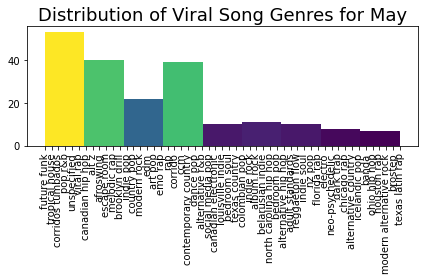

In [132]:
from matplotlib import colors
#https://matplotlib.org/stable/gallery/statistics/hist.html
plt.gcf().set_size_inches(25,20)
plt.figure(figsize=[15, 10])
# plt.figure(figsize=(15, 10)) 
fig, axs = plt.subplots(1, tight_layout=True)
# figsize=(25, 15)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(category1, bins='auto')
# N, bins, patches = axs[1].hist(category2, bins='auto')
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs.hist(category1, bins='auto', density=True)
plt.xticks(rotation=90)
plt.title("Distribution of Viral Song Genres for May", size=18)

plt.show()

<Figure size 1800x1440 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

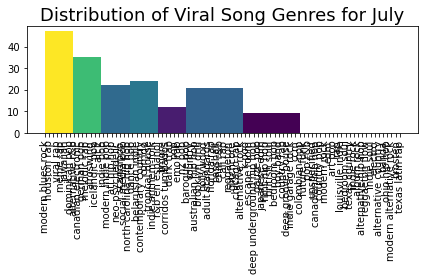

In [133]:
from matplotlib import colors
#https://matplotlib.org/stable/gallery/statistics/hist.html
plt.gcf().set_size_inches(25,20)
plt.figure(figsize=[15, 10])
# plt.figure(figsize=(15, 10)) 
fig, axs = plt.subplots(1, tight_layout=True)
# figsize=(25, 15)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(category2, bins='auto')
# N, bins, patches = axs[1].hist(category2, bins='auto')
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs.hist(category1, bins='auto', density=True)
plt.xticks(rotation=90)
plt.title("Distribution of Viral Song Genres for July", size=18)

plt.show()